In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./kmeans.csv')

In [3]:
df.head()

,X,Y
0,2,10
1,2,5
2,8,4
3,5,8
4,7,5


In [4]:
df.describe()

,X,Y
count,8.000000,8.000000
mean,4.375000,5.875000
std,2.559994,2.799872
min,1.000000,2.000000
25%,2.000000,4.000000
50%,4.500000,5.000000
75%,6.250000,8.250000
max,8.000000,10.000000


<AxesSubplot:xlabel='X', ylabel='Y'>

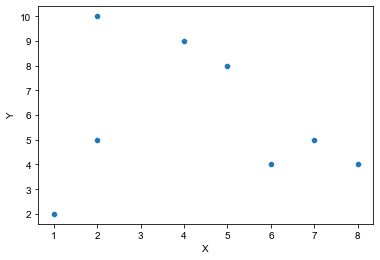

In [65]:
sns.scatterplot(data=df,x=df['X'],y=df['Y'])

### initial seed points
### A1,A4,A7

In [36]:
c1 = df.iloc[0,] #A1
c2 = df.iloc[3,] #A4
c3 = df.iloc[6,] #A7
c = [c1,c2,c3]

In [93]:
def distance(p1,p2):
    return abs(p1[0]-p2[0]) + abs(p1[1]-p2[1])

In [104]:
clusters = {
    'C1': [],
    'C2': [],
    'C3': []
}

In [105]:
for i in range(0,8):
    for j in range(0,3):
        clusters[f'C{j+1}'].append(distance(df.iloc[i],c[j]))

In [106]:
clustersDf = pd.DataFrame(clusters)

In [107]:
clustersDf

,C1,C2,C3
0,2.666667,10.666667,7.0
1,5.666667,5.666667,2.0
2,9.333333,1.333333,7.0
3,2.333333,5.666667,8.0
4,7.333333,0.666667,7.0
5,7.333333,1.333333,5.0
6,9.666667,8.333333,2.0
7,0.333333,7.666667,8.0


In [108]:
clustersDf['Allocated'] = clustersDf.idxmin(axis=1)

In [109]:
clustersDf

,C1,C2,C3,Allocated
0,2.666667,10.666667,7.0,C1
1,5.666667,5.666667,2.0,C3
2,9.333333,1.333333,7.0,C2
3,2.333333,5.666667,8.0,C1
4,7.333333,0.666667,7.0,C2
5,7.333333,1.333333,5.0,C2
6,9.666667,8.333333,2.0,C3
7,0.333333,7.666667,8.0,C1


In [110]:
C1 = clustersDf.loc[clustersDf['Allocated'] == 'C1']
C2 = clustersDf.loc[clustersDf['Allocated'] == 'C2']
C3 = clustersDf.loc[clustersDf['Allocated'] == 'C3']

In [89]:
def compute_centroid(cluster):
    return np.mean(cluster)

In [103]:
c1 = compute_centroid(df.iloc[C1.index])
c2 = compute_centroid(df.iloc[C2.index])
c3 = compute_centroid(df.iloc[C3.index])
c = [c1,c2,c3]

In [111]:
clustersDf['Allocated'] == old['Allocated'] # converged on 4th iteration

0    True
1    True
2    True
3    True
4    True
5    True
6    True
7    True
Name: Allocated, dtype: bool

In [112]:
old

,C1,C2,C3,Allocated
0,1.5,9.25,7.0,C1
1,5.5,4.75,2.0,C3
2,10.5,2.75,7.0,C2
3,3.5,4.25,8.0,C1
4,8.5,0.75,7.0,C2
5,8.5,1.75,5.0,C2
6,9.5,8.75,2.0,C3
7,1.5,6.25,8.0,C1


In [113]:
clustersDf

,C1,C2,C3,Allocated
0,2.666667,10.666667,7.0,C1
1,5.666667,5.666667,2.0,C3
2,9.333333,1.333333,7.0,C2
3,2.333333,5.666667,8.0,C1
4,7.333333,0.666667,7.0,C2
5,7.333333,1.333333,5.0,C2
6,9.666667,8.333333,2.0,C3
7,0.333333,7.666667,8.0,C1


In [115]:
df['Allocated'] = clustersDf['Allocated']

<AxesSubplot:xlabel='X', ylabel='Y'>

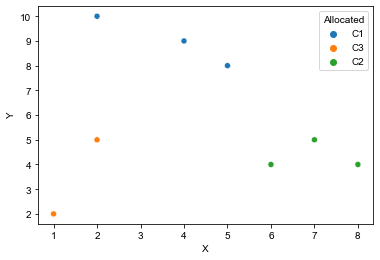

In [118]:
sns.scatterplot(data=df,x=df['X'],y=df['Y'],hue=df['Allocated'])